<a href="https://colab.research.google.com/github/guilhermelaviola/BusinessIntelligenceAndBigDataArchitectureWithAppliedDataScience/blob/main/Class10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytical SCM**
Analytical Supply Chain Management (SCM) is essential for improving efficiency, reducing costs, and increasing customer satisfaction by optimizing the flow of products, information, and resources from raw materials to final delivery. By leveraging data analytics, business intelligence, and technologies such as ERP–SCM integration, IoT, blockchain, and simulation tools, companies gain real-time visibility, transparency, and predictive capabilities across the supply chain. These tools enable better inventory optimization, lead-time reduction, demand forecasting, and risk management, as illustrated by a retail case study that uses historical data to manage seasonal demand and product lifecycles. Successful implementation of Analytical SCM also requires organizational collaboration and data-driven decision-making, ultimately making supply chains more efficient, responsive, and sustainable.

## **Example: Case Study Context**
This case study focuses on a mid-sized retail company facing challenges with inventory management and sustainability. The goal is to apply inventory optimization and sustainability analysis strategies to improve the company’s operational efficiency. The company has a variety of products with different life cycles and market demands, making inventory management complex and costly. Through detailed analysis of sales, procurement, and inventory data, the company seeks to minimize waste, optimize inventory levels, and adopt a more sustainable and profitable approach to managing its resources.
### **Goals**
- Minimize waste by optimizing inventory levels. Identify the most efficient purchasing strategies based on sales, procurement, and inventory data. Evaluate product sales performance to formulate a sustainable inventory management approach. Data Preprocessing.
- Consolidate all CSV files into a unified master dataset. Check for missing or erroneous entries. Standardize date formats for consistent time series analysis. Inventory Analysis.
- Assess inventory status at the beginning and end of the year using BegInvFINAL12312016.csv and EndInvFINAL12312016.csv. Identify products with the highest and lowest inventory presence. Sales Analysis.
- Examine SalesFINAL12312016.csv to identify top sellers and slow-selling products. Analyze sales trends over time, considering variables such as sales quantity, sales price, and date. Purchasing Analysis.
- Evaluate procurement activities using PurchasesFINAL12312016.csv and InvoicePurchases12312016.csv. Investigate purchase volumes from different suppliers, procurement costs, and supply chain processes. Calculate Optimal Inventory Level.
- Determine the optimal inventory level for each product, leveraging sales, procurement, and inventory data. Propose inventory levels adapted to product sales velocity and supply times. Conclusion: The insights gained from these analyses will provide recommendations for managing inventory more efficiently and sustainably, aiming to reduce costs and prevent excess inventory and waste.

In [6]:
# Importing all the necessary libraries:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [7]:
# Generating the datasets:
np.random.seed(42)

def random_dates(start, end, n):
    start_u = start.value // 10**9
    end_u = end.value // 10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

# Purchase Prices table:
purchase_prices = pd.DataFrame({
    'Brand': np.random.choice(['Smirnoff', 'Johnnie Walker', 'Sauvignon'], 50),
    'Description': np.random.choice(['Vodka', 'Whiskey', 'Wine'], 50),
    'Price': np.round(np.random.uniform(5, 50, 50), 2),
    'Size': np.random.choice(['375ml', '750ml', '1L'], 50),
    'Volume': np.random.choice([0.375, 0.75, 1.0], 50),
    'Classification': np.random.choice(['Spirits', 'Wine'], 50),
    'Purchase Price': np.round(np.random.uniform(4, 40, 50), 2),
    'VendorNumber': np.random.randint(1000, 1010, 50),
    'VendorName': np.random.choice(['Derrick', 'Marlene', 'Marcus'], 50)
})

# Beggining Inventory table:
beg_inv = pd.DataFrame({
    'InventoryId': range(1, 51),
    'Store': np.random.choice(['Store 01', 'Store 02'], 50),
    'City': np.random.choice(['New York', 'Chicago'], 50),
    'Brand': purchase_prices['Brand'],
    'Description': purchase_prices['Description'],
    'Size': purchase_prices['Size'],
    'OnHand': np.random.randint(0, 200, 50),
    'Price': purchase_prices['Price'],
    'StartDate': pd.to_datetime('2025-01-01')
})

# Ending Inventory table:
end_inv = pd.DataFrame({
    'InventoryId': beg_inv['InventoryId'],
    'Store': beg_inv['Store'],
    'City': beg_inv['City'],
    'Brand': beg_inv['Brand'],
    'Description': beg_inv['Description'],
    'Size': beg_inv['Size'],
    'OnHand': np.random.randint(0, 200, 50),
    'Price': beg_inv['Price'],
    'EndDate': pd.to_datetime('2025-12-31')
})

# Invoice Purchases table:
invoice_purchases = pd.DataFrame({
    'VendorNumber': np.random.randint(1000, 1010, 40),
    'VendorName': np.random.choice(['Derrick', 'Marlene', 'Marcus'], 40),
    'InvoiceDate': random_dates(pd.to_datetime('2025-01-01'), pd.to_datetime('2025-12-31'), 40),
    'PONumber': np.random.randint(50000, 60000, 40),
    'PODate': random_dates(pd.to_datetime('2025-01-01'), pd.to_datetime('2025-12-31'), 40),
    'PayDate': random_dates(pd.to_datetime('2025-01-01'), pd.to_datetime('2025-12-31'), 40),
    'Quantity': np.random.randint(1, 500, 40),
    'Dollars': np.round(np.random.uniform(500, 20000, 40), 2),
    'Freight': np.round(np.random.uniform(50, 500, 40), 2),
    'Approval': np.random.choice(['Yes', 'No'], 40)
})

# Purchases table:
purchases = pd.DataFrame({
    'InventoryID': np.random.choice(beg_inv['InventoryId'], 60),
    'Store': np.random.choice(['Store 01', 'Store 02'], 60),
    'Brand': np.random.choice(['Smirnoff', 'Johnnie Walker', 'Sauvignon'], 60),
    'Description': np.random.choice(['Vodka', 'Whiskey', 'Wine'], 60),
    'Size': np.random.choice(['375ml', '750ml', '1L'], 60),
    'VendorNumber': np.random.randint(1000, 1010, 60),
    'VendorName': np.random.choice(['Derrick', 'Marlene', 'Marcus'], 60),
    'PONumber': np.random.randint(50000, 60000, 60),
    'OrderDate': random_dates(pd.to_datetime('2025-01-01'), pd.to_datetime('2025-12-31'), 60),
    'ReceivingDate': random_dates(pd.to_datetime('2025-01-01'), pd.to_datetime('2025-12-31'), 60),
    'InvoiceDate': random_dates(pd.to_datetime('2025-01-01'), pd.to_datetime('2025-12-31'), 60),
    'PaymentDate': random_dates(pd.to_datetime('2025-01-01'), pd.to_datetime('2025-12-31'), 60),
    'PurchasePrice': np.round(np.random.uniform(5, 40, 60), 2),
    'Quantity': np.random.randint(1, 300, 60),
    'Dollars': lambda df=None: None,
    'Classification': np.random.choice(['Spirits', 'Wine'], 60)
})

purchases['Dollars'] = purchases['PurchasePrice'] * purchases['Quantity']

# Sales table:
sales = pd.DataFrame({
    'InventoryID': np.random.choice(beg_inv['InventoryId'], 80),
    'Store': np.random.choice(['Store 01', 'Store 02'], 80),
    'Brand': np.random.choice(['Smirnoff', 'Johnnie Walker', 'Sauvignon'], 80),
    'Description': np.random.choice(['Vodka', 'Whiskey', 'Wine'], 80),
    'Size': np.random.choice(['375ml', '750ml', '1L'], 80),
    'SalesQuantity': np.random.randint(1, 100, 80),
    'SalesPrice': np.round(np.random.uniform(8, 60, 80), 2),
    'SalesDate': random_dates(pd.to_datetime('2025-01-01'), pd.to_datetime('2025-12-31'), 80),
    'Volume': np.random.choice([0.375, 0.75, 1.0], 80),
    'Classification': np.random.choice(['Spirits', 'Wine'], 80),
    'ExciseTax': np.round(np.random.uniform(0.5, 5, 80), 2),
    'VendorNo.': np.random.randint(1000, 1010, 80),
    'VendorName': np.random.choice(['Derrick', 'Marlene', 'Marcus'], 80)
})

sales['SalesDollars'] = sales['SalesPrice'] * sales['SalesQuantity']

In [8]:
# Grouping by Brand and Description and summarizing the inventory at the start of the year:
start_summary = beg_inv.groupby(['Brand', 'Description'])['OnHand'].sum().sort_values(ascending=False)

# Groupting by Brand and Description and summarizing the inventory at the end of the year:
end_summary = end_inv.groupby(['Brand', 'Description'])['OnHand'].sum().sort_values(ascending=False)

# Identifying the most popular productus at the start and end of the year:
top_5_start = start_summary.head(5)
top_5_end = end_summary.head(5)

# Identifying the least popular productus at the start and end of the year:
bottom_5_start = start_summary.tail(5)
bottom_5_end = end_summary.tail(5)

# Dislaying the results:
print('Top 5 products at the start of the year:\n', top_5_start)
print('\nTop 5 products at the end of the year:\n', top_5_end)
print('\nBottom 5 products at the start of the year:\n', bottom_5_start)
print('\nBottom 5 products at the end of the year:\n', bottom_5_end)

Top 5 products at the start of the year:
 Brand           Description
Johnnie Walker  Whiskey        868
Sauvignon       Vodka          827
Smirnoff        Whiskey        723
Sauvignon       Wine           721
                Whiskey        637
Name: OnHand, dtype: int64

Top 5 products at the end of the year:
 Brand           Description
Smirnoff        Whiskey        998
Johnnie Walker  Whiskey        929
Sauvignon       Vodka          867
Johnnie Walker  Vodka          729
Sauvignon       Wine           611
Name: OnHand, dtype: int64

Bottom 5 products at the start of the year:
 Brand           Description
Sauvignon       Whiskey        637
Smirnoff        Wine           435
Johnnie Walker  Vodka          397
Smirnoff        Vodka          345
Johnnie Walker  Wine            75
Name: OnHand, dtype: int64

Bottom 5 products at the end of the year:
 Brand           Description
Sauvignon       Wine           611
Smirnoff        Wine           517
Sauvignon       Whiskey        464
Smir

In [9]:
# Finding the most sold products:
most_sold = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f'10 most sold products:\n{most_sold}\n')

# Finding the least sold products:
least_sold = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f'10 least sold products:\n{least_sold}\n')

10 most sold products:
                            SalesQuantity
Brand          Description               
Smirnoff       Whiskey                587
Johnnie Walker Vodka                  542
               Whiskey                532
Sauvignon      Vodka                  504
Smirnoff       Vodka                  418
               Wine                   373
Sauvignon      Whiskey                357
               Wine                   309
Johnnie Walker Wine                   215

10 least sold products:
                            SalesQuantity
Brand          Description               
Johnnie Walker Wine                   215
Sauvignon      Wine                   309
               Whiskey                357
Smirnoff       Wine                   373
               Vodka                  418
Sauvignon      Vodka                  504
Johnnie Walker Whiskey                532
               Vodka                  542
Smirnoff       Whiskey                587



In [10]:
purchases['OrderDate'] = pd.to_datetime(purchases['OrderDate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')
purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['OrderDate']).dt.days
average_supply_duration = purchases['SupplyDuration'].mean()
print('Average duration of supply (in days):', average_supply_duration)

Average duration of supply (in days): -0.11666666666666667


In [11]:
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PaymentDate'] = pd.to_datetime(purchases['PaymentDate'])
purchases['PaymentDuration'] = (purchases['PaymentDate'] - purchases['InvoiceDate']).dt.days
average_payment_duration = purchases['PaymentDuration'].mean()
print('Average payment duration (in days):', average_payment_duration)

Average payment duration (in days): 11.433333333333334


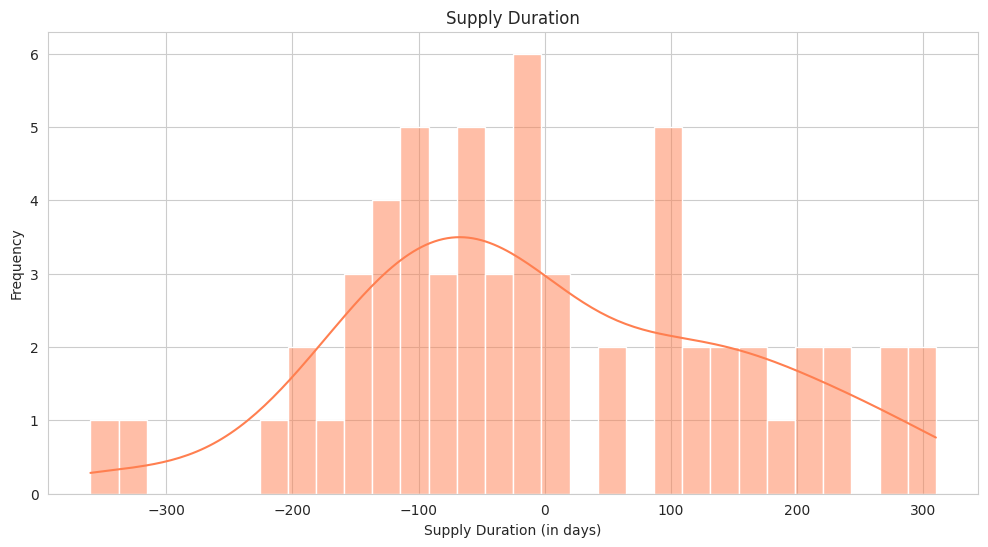

In [12]:
# Setting the histogram styles:
sns.set_style('whitegrid')

# Histogram for the supply duration:
plt.figure(figsize=(12, 6))
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color='coral')
plt.title('Supply Duration')
plt.xlabel('Supply Duration (in days)')
plt.ylabel('Frequency')
plt.show()

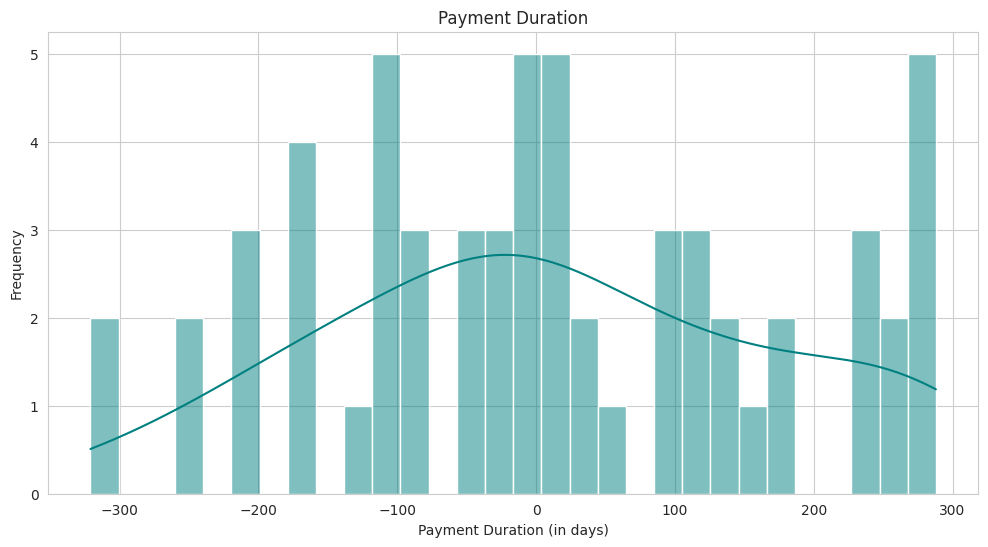

In [13]:
# Histogram for the payment duration:
plt.figure(figsize=(12, 6))
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color='teal')
plt.title('Payment Duration')
plt.xlabel('Payment Duration (in days)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Determining the sales period:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
start_date = sales['SalesDate'].min()
end_date = sales['SalesDate'].max()
total_days = (end_date - start_date).days
total_days

352

In [15]:
# Calculating the sale speed for each product:
sales_velocity = sales.groupby(['Brand', 'Description']).agg(Total_Sales=('SalesQuantity', 'sum')).reset_index()
sales_velocity['Sales_Per_Day'] = sales_velocity['Total_Sales'] / total_days
sales_velocity['Sales_Per_Day']

,Sales_Per_Day
0,1.539773
1,1.511364
2,0.610795
3,1.431818
4,1.014205
5,0.877841
6,1.187500
7,1.667614
8,1.059659


In [16]:
# Calculating the delivery time:
purchases.loc[:, 'Lead_Time'] = (purchases['ReceivingDate'] - purchases['OrderDate']).dt.days
lead_times = purchases.groupby(['Brand', 'Description']).agg(Avg_Lead_Time=('Lead_Time', 'mean')).reset_index()
lead_times

,Brand,Description,Avg_Lead_Time
0,Johnnie Walker,Vodka,163.166667
1,Johnnie Walker,Whiskey,19.714286
2,Johnnie Walker,Wine,53.000000
3,Sauvignon,Vodka,-30.500000
4,Sauvignon,Whiskey,62.600000
5,Sauvignon,Wine,-98.500000
6,Smirnoff,Vodka,-97.571429
7,Smirnoff,Whiskey,-47.000000
8,Smirnoff,Wine,68.285714


In [17]:
# Merging Sales and Purchase Data:
merged_data = pd.merge(sales_velocity, lead_times, on=['Brand', 'Description'], how='left')
merged_data

,Brand,Description,Total_Sales,Sales_Per_Day,Avg_Lead_Time
0,Johnnie Walker,Vodka,542,1.539773,163.166667
1,Johnnie Walker,Whiskey,532,1.511364,19.714286
2,Johnnie Walker,Wine,215,0.610795,53.000000
3,Sauvignon,Vodka,504,1.431818,-30.500000
4,Sauvignon,Whiskey,357,1.014205,62.600000
5,Sauvignon,Wine,309,0.877841,-98.500000
6,Smirnoff,Vodka,418,1.187500,-97.571429
7,Smirnoff,Whiskey,587,1.667614,-47.000000
8,Smirnoff,Wine,373,1.059659,68.285714


In [18]:
# Calculating Safety Stock using maximum sales for each product:
max_vendas = sales.groupby(['Brand', 'Description']).agg(Max_Vendas_Diarias=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_vendas, on=['Brand', 'Description'], how='left')
merged_data

,Brand,Description,Total_Sales,Sales_Per_Day,Avg_Lead_Time,Max_Vendas_Diarias
0,Johnnie Walker,Vodka,542,1.539773,163.166667,78
1,Johnnie Walker,Whiskey,532,1.511364,19.714286,92
2,Johnnie Walker,Wine,215,0.610795,53.000000,60
3,Sauvignon,Vodka,504,1.431818,-30.500000,99
4,Sauvignon,Whiskey,357,1.014205,62.600000,85
5,Sauvignon,Wine,309,0.877841,-98.500000,97
6,Smirnoff,Vodka,418,1.187500,-97.571429,90
7,Smirnoff,Whiskey,587,1.667614,-47.000000,97
8,Smirnoff,Wine,373,1.059659,68.285714,81


In [19]:
# Calculating the Optimal Stock Level:
merged_data['Optimal_Stock_Level'] = merged_data['Sales_Per_Day'] * merged_data['Avg_Lead_Time']
merged_data['Optimal_Stock_Level']

,Optimal_Stock_Level
0,251.239583
1,29.795455
2,32.372159
3,-43.670455
4,63.489205
5,-86.467330
6,-115.866071
7,-78.377841
8,72.359578


In [20]:
# Calculating Safety Stock:
max_sales = sales.groupby(['Brand', 'Description']).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']
merged_data['Recommended_Stock_Level']

,Recommended_Stock_Level
0,327.699811
1,120.284091
2,91.761364
3,53.897727
4,147.475000
5,9.654830
6,-27.053571
7,16.954545
8,152.299919


/tmp/ipython-input-2140069303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recommended_Stock_Level', y='Description', data=ordered_data.head(20), palette='viridis')  # showing the top 20 products for better visualization


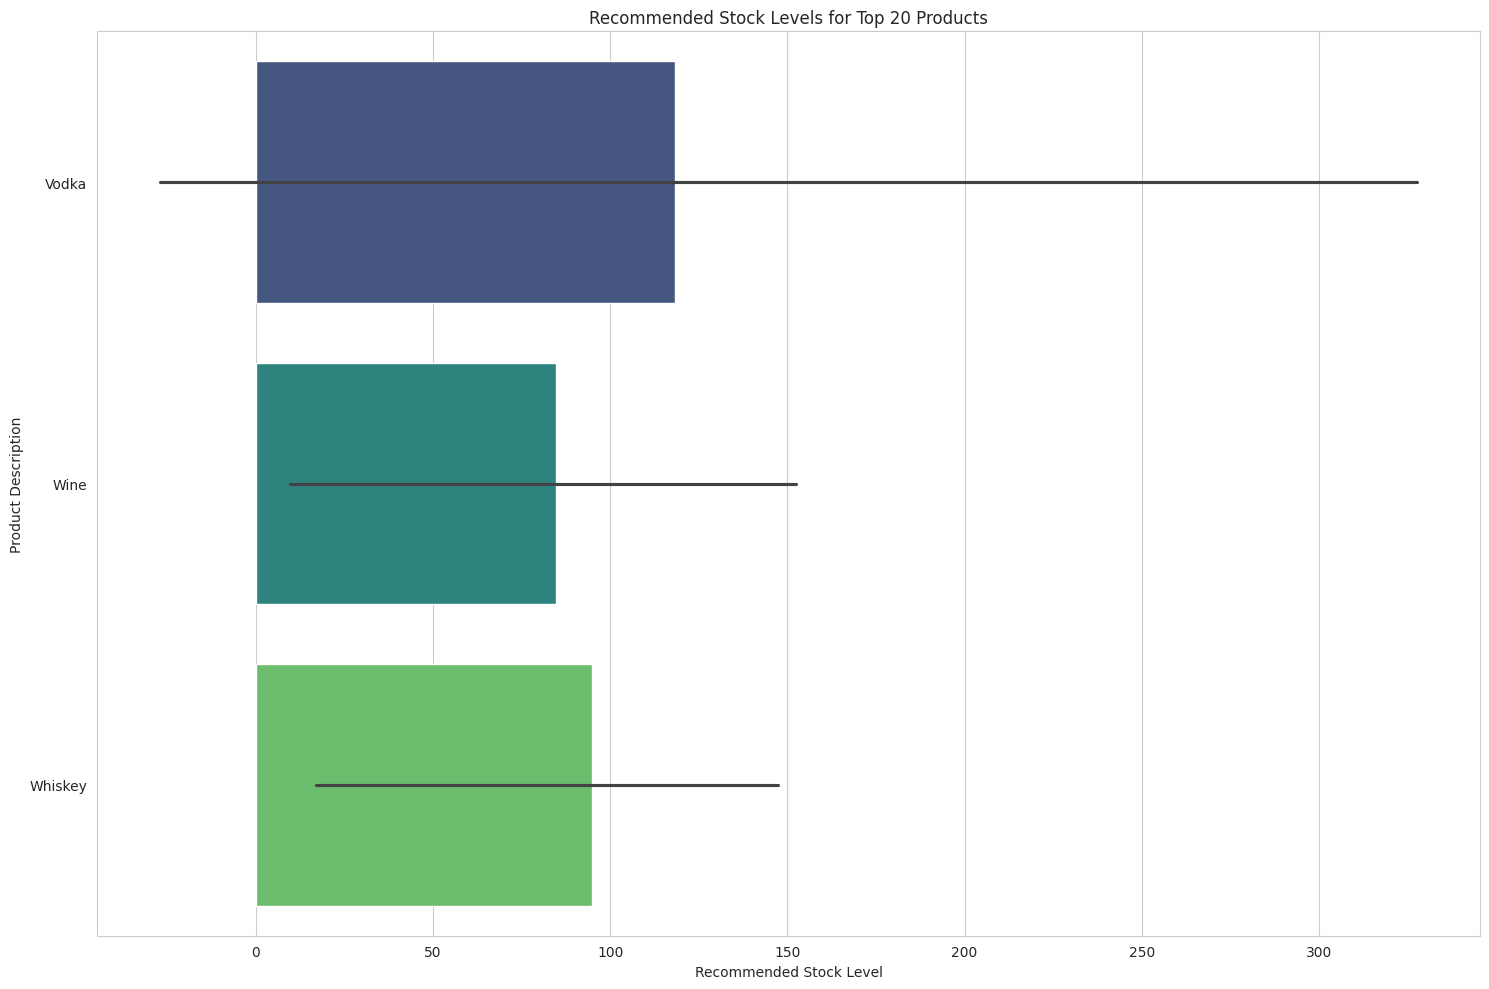

In [21]:
# Sorting data by Recommended Stock Level for better visualization:
ordered_data = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)

# Plotting the study:
plt.figure(figsize=(15, 10))
sns.barplot(x='Recommended_Stock_Level', y='Description', data=ordered_data.head(20), palette='viridis')  # showing the top 20 products for better visualization
plt.xlabel('Recommended Stock Level')
plt.ylabel('Product Description')
plt.title('Recommended Stock Levels for Top 20 Products')
plt.tight_layout()
plt.show()